Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv('movies.csv')
movies_df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

In [3]:
# code here
movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title'],inplace=True, axis=1)

#### Remove any duplicate rows

In [4]:
# code here
movies_df.drop_duplicates()
movies_df

budget                                             genres      id  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   
...         ...                                                ...     ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...    9367   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   72766   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...  231617   
4801          0                                                 []  126186   
4802          0                [{"id": 99, "name": "Documentary"}]   25975   

      popularity                               production_countries  \
0     150.437577  [{"iso_3166_1": "US", "name": "United States o...   
1     139.082615  [{"iso_3166_1": "US", "name": "United States o...   
2     107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   
3     112.312950  [{"iso_3166_1": "US", "name": "United States o...   
4      43.926995  [{"iso_3166_1": "US", "name": "United States o...   
...          ...                                                ...   
4798   14.269792  [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...   
4799    0.642552                                                 []   
4800    1.444476  [{"iso_3166_1": "US", "name": "United States o...   
4801    0.857008  [{"iso_3166_1": "US", "name": "United States o...   
4802    1.929883  [{"iso_3166_1": "US", "name": "United States o...   

     release_date     revenue  runtime  \
0      2009-12-10  2787965087    162.0   
1      2007-05-19   961000000    169.0   
2      2015-10-26   880674609    148.0   
3      2012-07-16  1084939099    165.0   
4      2012-03-07   284139100    132.0   
...           ...         ...      ...   
4798   1992-09-04     2040920     81.0   
4799   2011-12-26           0     85.0   
4800   2013-10-13           0    120.0   
4801   2012-05-03           0     98.0   
4802   2005-08-05           0     90.0   

                                       spoken_languages  \
0     [{"iso_639_1": "en", "name": "English"}, {"iso...   
1              [{"iso_639_1": "en", "name": "English"}]   
2     [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3              [{"iso_639_1": "en", "name": "English"}]   
4              [{"iso_639_1": "en", "name": "English"}]   
...                                                 ...   
4798      [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]   
4799                                                 []   
4800           [{"iso_639_1": "en", "name": "English"}]   
4801           [{"iso_639_1": "en", "name": "English"}]   
4802           [{"iso_639_1": "en", "name": "English"}]   

                                         title  vote_average  vote_count  
0                                       Avatar           7.2       11800  
1     Pirates of the Caribbean: At World's End           6.9        4500  
2                                      Spectre           6.3        4466  
3                        The Dark Knight Rises           7.6        9106  
4                                  John Carter           6.1        2124  
...                                        ...           ...         ...  
4798                               El Mariachi           6.6         238  
4799                                 Newlyweds           5.9           5  
4800                 Signed, Sealed, Delivered           7.0           6  
4801                          Shanghai Calling           5.7           7  
4802                         My Date with Drew           6.3          16  

[4803 rows x 12 columns]

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [5]:
# Code here
movies_df = movies_df.drop(movies_df[movies_df['budget'] == 0].index)
movies_df = movies_df.drop(movies_df[movies_df['revenue'] == 0].index)
movies_df

budget                                             genres      id  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   
...         ...                                                ...     ...   
4773      27000                     [{"id": 35, "name": "Comedy"}]    2292   
4788      12000  [{"id": 27, "name": "Horror"}, {"id": 35, "nam...     692   
4792      20000  [{"id": 80, "name": "Crime"}, {"id": 27, "name...   36095   
4796       7000  [{"id": 878, "name": "Science Fiction"}, {"id"...   14337   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...    9367   

      popularity                               production_countries  \
0     150.437577  [{"iso_3166_1": "US", "name": "United States o...   
1     139.082615  [{"iso_3166_1": "US", "name": "United States o...   
2     107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   
3     112.312950  [{"iso_3166_1": "US", "name": "United States o...   
4      43.926995  [{"iso_3166_1": "US", "name": "United States o...   
...          ...                                                ...   
4773   19.748658  [{"iso_3166_1": "US", "name": "United States o...   
4788    4.553644  [{"iso_3166_1": "US", "name": "United States o...   
4792    0.212443            [{"iso_3166_1": "JP", "name": "Japan"}]   
4796   23.307949  [{"iso_3166_1": "US", "name": "United States o...   
4798   14.269792  [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...   

     release_date     revenue  runtime  \
0      2009-12-10  2787965087    162.0   
1      2007-05-19   961000000    169.0   
2      2015-10-26   880674609    148.0   
3      2012-07-16  1084939099    165.0   
4      2012-03-07   284139100    132.0   
...           ...         ...      ...   
4773   1994-09-13     3151130     92.0   
4788   1972-03-12     6000000     93.0   
4792   1997-11-06       99000    111.0   
4796   2004-10-08      424760     77.0   
4798   1992-09-04     2040920     81.0   

                                       spoken_languages  \
0     [{"iso_639_1": "en", "name": "English"}, {"iso...   
1              [{"iso_639_1": "en", "name": "English"}]   
2     [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3              [{"iso_639_1": "en", "name": "English"}]   
4              [{"iso_639_1": "en", "name": "English"}]   
...                                                 ...   
4773           [{"iso_639_1": "en", "name": "English"}]   
4788           [{"iso_639_1": "en", "name": "English"}]   
4792  [{"iso_639_1": "ja", "name": "\u65e5\u672c\u8a...   
4796           [{"iso_639_1": "en", "name": "English"}]   
4798      [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]   

                                         title  vote_average  vote_count  
0                                       Avatar           7.2       11800  
1     Pirates of the Caribbean: At World's End           6.9        4500  
2                                      Spectre           6.3        4466  
3                        The Dark Knight Rises           7.6        9106  
4                                  John Carter           6.1        2124  
...                                        ...           ...         ...  
4773                                    Clerks           7.4         755  
4788                            Pink Flamingos           6.2         110  
4792                                      Cure           7.4          63  
4796                                    Primer           6.9         658  
4798                               El Mariachi           6.6         238  

[3229 rows x 12 columns]

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [6]:
# Change the release_date column to DateTime column
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')

# Extract the release year from every release date
movies_df['Year'] = pd.to_datetime(movies_df['release_date']).dt.year
movies_df['Year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4773    1994
4788    1972
4792    1997
4796    2004
4798    1992
Name: Year, Length: 3229, dtype: int64

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [7]:
# code here
movies_df = movies_df.astype({"budget":"int64","revenue":"int64"})
print(movies_df.dtypes)

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
Year                             int64
dtype: object


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [8]:
movies_df = movies_df[['genres', 'title', 'id', 'popularity', 'spoken_languages', 'production_countries', 'runtime', 'release_date', 'Year', 'vote_average', 'vote_count', 'budget', 'revenue']]
movies_df.head()

genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                      title      id  popularity  \
0                                    Avatar   19995  150.437577   
1  Pirates of the Caribbean: At World's End     285  139.082615   
2                                   Spectre  206647  107.376788   
3                     The Dark Knight Rises   49026  112.312950   
4                               John Carter   49529   43.926995   

                                    spoken_languages  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1           [{"iso_639_1": "en", "name": "English"}]   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3           [{"iso_639_1": "en", "name": "English"}]   
4           [{"iso_639_1": "en", "name": "English"}]   

                                production_countries  runtime release_date  \
0  [{"iso_3166_1": "US", "name": "United States o...    162.0   2009-12-10   
1  [{"iso_3166_1": "US", "name": "United States o...    169.0   2007-05-19   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...    148.0   2015-10-26   
3  [{"iso_3166_1": "US", "name": "United States o...    165.0   2012-07-16   
4  [{"iso_3166_1": "US", "name": "United States o...    132.0   2012-03-07   

   Year  vote_average  vote_count     budget     revenue  
0  2009           7.2       11800  237000000  2787965087  
1  2007           6.9        4500  300000000   961000000  
2  2015           6.3        4466  245000000   880674609  
3  2012           7.6        9106  250000000  1084939099  
4  2012           6.1        2124  260000000   284139100

In [ ]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
parse_col_json("genres", "name")
parse_col_json("spoken_languages", "name")
parse_col_json("cast", "name")
parse_col_json("production_countries", "name")

movies_df.head()

### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [18]:
sorted = movies_df.sort_values(by='budget', ascending=False)
sorted.head()

genres  \
17  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
1   [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
7   [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
10  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
4   [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                          title     id  popularity  \
17  Pirates of the Caribbean: On Stranger Tides   1865  135.413856   
1      Pirates of the Caribbean: At World's End    285  139.082615   
7                       Avengers: Age of Ultron  99861  134.279229   
10                             Superman Returns   1452   57.925623   
4                                   John Carter  49529   43.926995   

                                     spoken_languages  \
17  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1            [{"iso_639_1": "en", "name": "English"}]   
7            [{"iso_639_1": "en", "name": "English"}]   
10  [{"iso_639_1": "en", "name": "English"}, {"iso...   
4            [{"iso_639_1": "en", "name": "English"}]   

                                 production_countries  runtime release_date  \
17  [{"iso_3166_1": "US", "name": "United States o...    136.0   2011-05-14   
1   [{"iso_3166_1": "US", "name": "United States o...    169.0   2007-05-19   
7   [{"iso_3166_1": "US", "name": "United States o...    141.0   2015-04-22   
10  [{"iso_3166_1": "US", "name": "United States o...    154.0   2006-06-28   
4   [{"iso_3166_1": "US", "name": "United States o...    132.0   2012-03-07   

    Year  vote_average  vote_count     budget     revenue  
17  2011           6.4        4948  380000000  1045713802  
1   2007           6.9        4500  300000000   961000000  
7   2015           7.3        6767  280000000  1405403694  
10  2006           5.4        1400  270000000   391081192  
4   2012           6.1        2124  260000000   284139100

In [17]:
sorted.tail()

genres               title  \
4608  [{"id": 14, "name": "Fantasy"}, {"id": 27, "na...        The Prophecy   
3372  [{"id": 53, "name": "Thriller"}, {"id": 28, "n...        Split Second   
3419  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...        Bran Nue Dae   
3611  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...  A Farewell to Arms   
4238  [{"id": 18, "name": "Drama"}, {"id": 35, "name...        Modern Times   

         id  popularity                          spoken_languages  \
4608  11980   11.818333  [{"iso_639_1": "en", "name": "English"}]   
3372  13006    4.857028  [{"iso_639_1": "en", "name": "English"}]   
3419  38415    0.050456                                        []   
3611  22649    1.199451  [{"iso_639_1": "en", "name": "English"}]   
4238   3082   28.276480  [{"iso_639_1": "en", "name": "English"}]   

                                   production_countries  runtime release_date  \
4608  [{"iso_3166_1": "US", "name": "United States o...     98.0   1995-09-01   
3372   [{"iso_3166_1": "GB", "name": "United Kingdom"}]     90.0   1992-05-01   
3419                                                 []     82.0   2009-08-09   
3611  [{"iso_3166_1": "US", "name": "United States o...     89.0   1932-12-08   
4238  [{"iso_3166_1": "US", "name": "United States o...     87.0   1936-02-05   

      Year  vote_average  vote_count  budget  revenue  
4608  1995           6.4         138       8       16  
3372  1992           5.7          63       7        5  
3419  2009           5.2           6       7        7  
3611  1932           6.2          28       4       25  
4238  1936           8.1         856       1  8500000

In [19]:
data_profit = sorted['revenue']-sorted['budget']
data_profit

17       665713802
1        661000000
7       1125403694
10       121081192
4         24139100
           ...    
4608             8
3372            -2
3419             0
3611            21
4238       8499999
Length: 3229, dtype: int64

In [20]:
data_perform = sorted['popularity']
data_perform 

17      135.413856
1       139.082615
7       134.279229
10       57.925623
4        43.926995
           ...    
4608     11.818333
3372      4.857028
3419      0.050456
3611      1.199451
4238     28.276480
Name: popularity, Length: 3229, dtype: float64

In [21]:
title_group = sorted.groupby(by=['title'], sort = False)
title_data_avg = round(title_group.mean(),0)
title_data_avg

id  popularity  runtime  \
title                                                                       
Pirates of the Caribbean: On Stranger Tides   1865.0       135.0    136.0   
Pirates of the Caribbean: At World's End       285.0       139.0    169.0   
Avengers: Age of Ultron                      99861.0       134.0    141.0   
Superman Returns                              1452.0        58.0    154.0   
John Carter                                  49529.0        44.0    132.0   
...                                              ...         ...      ...   
The Prophecy                                 11980.0        12.0     98.0   
Split Second                                 13006.0         5.0     90.0   
Bran Nue Dae                                 38415.0         0.0     82.0   
A Farewell to Arms                           22649.0         1.0     89.0   
Modern Times                                  3082.0        28.0     87.0   

                                               Year  vote_average  vote_count  \
title                                                                           
Pirates of the Caribbean: On Stranger Tides  2011.0           6.0      4948.0   
Pirates of the Caribbean: At World's End     2007.0           7.0      4500.0   
Avengers: Age of Ultron                      2015.0           7.0      6767.0   
Superman Returns                             2006.0           5.0      1400.0   
John Carter                                  2012.0           6.0      2124.0   
...                                             ...           ...         ...   
The Prophecy                                 1995.0           6.0       138.0   
Split Second                                 1992.0           6.0        63.0   
Bran Nue Dae                                 2009.0           5.0         6.0   
A Farewell to Arms                           1932.0           6.0        28.0   
Modern Times                                 1936.0           8.0       856.0   

                                                  budget       revenue  
title                                                                   
Pirates of the Caribbean: On Stranger Tides  380000000.0  1.045714e+09  
Pirates of the Caribbean: At World's End     300000000.0  9.610000e+08  
Avengers: Age of Ultron                      280000000.0  1.405404e+09  
Superman Returns                             270000000.0  3.910812e+08  
John Carter                                  260000000.0  2.841391e+08  
...                                                  ...           ...  
The Prophecy                                         8.0  1.600000e+01  
Split Second                                         7.0  5.000000e+00  
Bran Nue Dae                                         7.0  7.000000e+00  
A Farewell to Arms                                   4.0  2.500000e+01  
Modern Times                                         1.0  8.500000e+06  

[3228 rows x 8 columns]

<AxesSubplot:xlabel='title'>

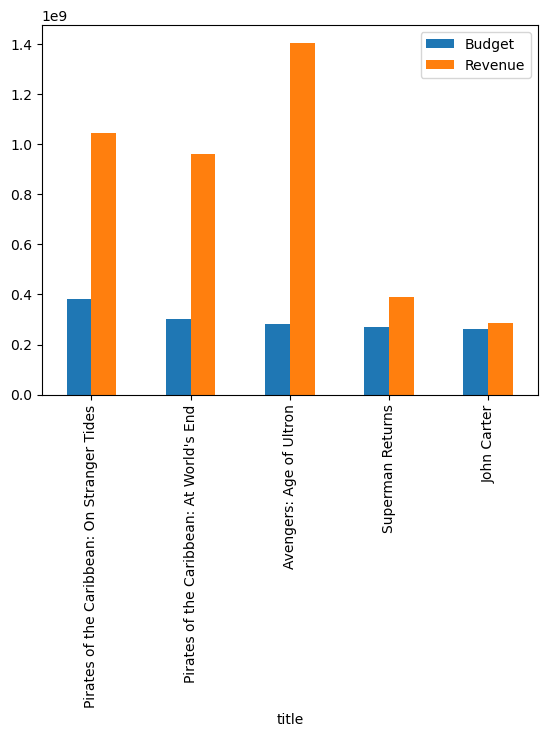

In [22]:
movie_data_series = title_data_avg.iloc[5:5,1]


## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Budget': title_data_avg['budget'],
                                     'Revenue': title_data_avg['revenue'],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:5,]
features_of_interest.plot(kind='bar')

<AxesSubplot:xlabel='title'>

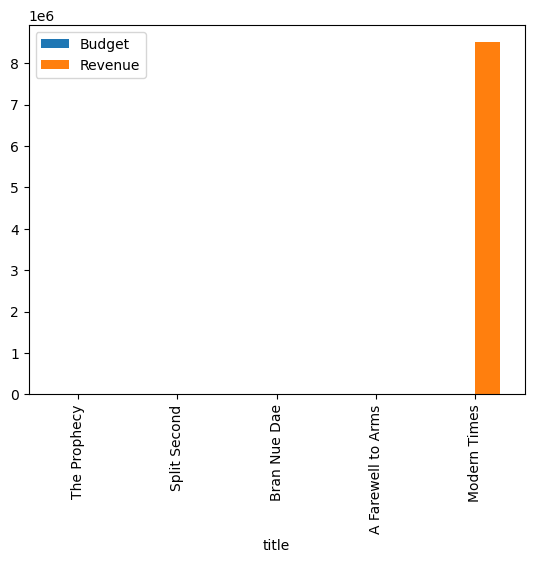

In [23]:
movie_data_series = title_data_avg.iloc[5:5,1]


## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Budget': title_data_avg['budget'],
                                     'Revenue': title_data_avg['revenue'],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[-5:,]
features_of_interest.plot(kind='bar')

According to the data above we can see that the movies with the highest budgets by far produced the most revenue. In comparison,  the cheapest or lowest budget movies, hardly ever turned a profit and were very low in popularity scores.

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [24]:
data_profit = title_data_avg['revenue']-title_data_avg['budget']
data_profit.sort_values(ascending = False)


title
Avatar                          2.550965e+09
Titanic                         1.645034e+09
Jurassic World                  1.363529e+09
Furious 7                       1.316249e+09
The Avengers                    1.299558e+09
                                    ...     
The Adventures of Pluto Nash   -9.289603e+07
The 13th Warrior               -9.830110e+07
Mars Needs Moms                -1.110072e+08
The Alamo                      -1.191800e+08
The Lone Ranger                -1.657101e+08
Length: 3228, dtype: float64

In [25]:
movies_df['profit'] = movies_df['revenue']-movies_df['budget']
movies_df


genres  \
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...                                                 ...   
4773                     [{"id": 35, "name": "Comedy"}]   
4788  [{"id": 27, "name": "Horror"}, {"id": 35, "nam...   
4792  [{"id": 80, "name": "Crime"}, {"id": 27, "name...   
4796  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4798  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   

                                         title      id  popularity  \
0                                       Avatar   19995  150.437577   
1     Pirates of the Caribbean: At World's End     285  139.082615   
2                                      Spectre  206647  107.376788   
3                        The Dark Knight Rises   49026  112.312950   
4                                  John Carter   49529   43.926995   
...                                        ...     ...         ...   
4773                                    Clerks    2292   19.748658   
4788                            Pink Flamingos     692    4.553644   
4792                                      Cure   36095    0.212443   
4796                                    Primer   14337   23.307949   
4798                               El Mariachi    9367   14.269792   

                                       spoken_languages  \
0     [{"iso_639_1": "en", "name": "English"}, {"iso...   
1              [{"iso_639_1": "en", "name": "English"}]   
2     [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3              [{"iso_639_1": "en", "name": "English"}]   
4              [{"iso_639_1": "en", "name": "English"}]   
...                                                 ...   
4773           [{"iso_639_1": "en", "name": "English"}]   
4788           [{"iso_639_1": "en", "name": "English"}]   
4792  [{"iso_639_1": "ja", "name": "\u65e5\u672c\u8a...   
4796           [{"iso_639_1": "en", "name": "English"}]   
4798      [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]   

                                   production_countries  runtime release_date  \
0     [{"iso_3166_1": "US", "name": "United States o...    162.0   2009-12-10   
1     [{"iso_3166_1": "US", "name": "United States o...    169.0   2007-05-19   
2     [{"iso_3166_1": "GB", "name": "United Kingdom"...    148.0   2015-10-26   
3     [{"iso_3166_1": "US", "name": "United States o...    165.0   2012-07-16   
4     [{"iso_3166_1": "US", "name": "United States o...    132.0   2012-03-07   
...                                                 ...      ...          ...   
4773  [{"iso_3166_1": "US", "name": "United States o...     92.0   1994-09-13   
4788  [{"iso_3166_1": "US", "name": "United States o...     93.0   1972-03-12   
4792            [{"iso_3166_1": "JP", "name": "Japan"}]    111.0   1997-11-06   
4796  [{"iso_3166_1": "US", "name": "United States o...     77.0   2004-10-08   
4798  [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...     81.0   1992-09-04   

      Year  vote_average  vote_count     budget     revenue      profit  
0     2009           7.2       11800  237000000  2787965087  2550965087  
1     2007           6.9        4500  300000000   961000000   661000000  
2     2015           6.3        4466  245000000   880674609   635674609  
3     2012           7.6        9106  250000000  1084939099   834939099  
4     2012           6.1        2124  260000000   284139100    24139100  
...    ...           ...         ...        ...         ...         ...  
4773  1994           7.4         755      27000     3151130     3124130  
4788  1972           6.2         110      12000     6000000     5988000  
4792  1997           7.4          63      20000       99000       79000  
4796  2004           6.9         658       7000      424760      417760  
479

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [26]:
# Code here
sorted_pop = movies_df.sort_values(by='popularity', ascending=False)
sorted_pop = sorted_pop[movies_df.popularity > 7]
title_group = sorted_pop.groupby(by=['title'], sort = False)
title_data_avg = round(title_group.mean(),0)
title_data_avg

C:\Users\Samuel\AppData\Local\Temp\ipykernel_10716\3258325927.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_pop = sorted_pop[movies_df.popularity > 7]


id  popularity  runtime    Year  vote_average  \
title                                                                          
Minions                  211672.0       876.0     91.0  2015.0           6.0   
Interstellar             157336.0       724.0    169.0  2014.0           8.0   
Deadpool                 293660.0       515.0    108.0  2016.0           7.0   
Guardians of the Galaxy  118340.0       481.0    121.0  2014.0           8.0   
Mad Max: Fury Road        76341.0       434.0    120.0  2015.0           7.0   
...                           ...         ...      ...     ...           ...   
Cutthroat Island           1408.0         7.0    119.0  1995.0           6.0   
Evita                      8818.0         7.0    134.0  1996.0           6.0   
BloodRayne               168705.0         7.0     95.0  2005.0           4.0   
My Soul to Take           43931.0         7.0    107.0  2010.0           5.0   
The Rose                  16323.0         7.0    125.0  1979.0           7.0   

                         vote_count       budget       revenue        profit  
title                                                                         
Minions                      4571.0   74000000.0  1.156731e+09  1.082731e+09  
Interstellar                10867.0  165000000.0  6.751200e+08  5.101200e+08  
Deadpool                    10995.0   58000000.0  7.831130e+08  7.251130e+08  
Guardians of the Galaxy      9742.0  170000000.0  7.733286e+08  6.033286e+08  
Mad Max: Fury Road           9427.0  150000000.0  3.788583e+08  2.288583e+08  
...                             ...          ...           ...           ...  
Cutthroat Island              136.0   98000000.0  1.001732e+07 -8.798268e+07  
Evita                         120.0   55000000.0  1.410472e+08  8.604718e+07  
BloodRayne                    118.0   25000000.0  2.405420e+06 -2.259458e+07  
My Soul to Take               147.0   25000000.0  1.982996e+07 -5.170043e+06  
The Rose                       28.0    9250000.0  2.917465e+07  1.992465e+07  

[2709 rows x 9 columns]

#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [27]:
# The most profitable year was 2016
sorted_year = movies_df.sort_values(by=['Year', 'profit'], ascending=False)
title_group = sorted_year.groupby(by=['title'], sort = False)
title_data_avg = round(title_group.mean(),0)
title_data_avg


id  popularity  runtime    Year  \
title                                                                       
Captain America: Civil War          271110.0       198.0    147.0  2016.0   
The Secret Life of Pets             328111.0        31.0     87.0  2016.0   
The Jungle Book                     278927.0        94.0    106.0  2016.0   
Deadpool                            293660.0       515.0    108.0  2016.0   
Batman v Superman: Dawn of Justice  209112.0       156.0    151.0  2016.0   
...                                      ...         ...      ...     ...   
Hell's Angels                        22301.0         8.0    127.0  1930.0   
The Broadway Melody                  65203.0         1.0    100.0  1929.0   
Metropolis                              19.0        32.0    153.0  1927.0   
The Big Parade                        3060.0         1.0    151.0  1925.0   
Intolerance                           3059.0         3.0    197.0  1916.0   

                                    vote_average  vote_count       budget  \
title                                                                       
Captain America: Civil War                   7.0      7241.0  250000000.0   
The Secret Life of Pets                      6.0      3462.0   75000000.0   
The Jungle Book                              7.0      2892.0  175000000.0   
Deadpool                                     7.0     10995.0   58000000.0   
Batman v Superman: Dawn of Justice           6.0      7004.0  250000000.0   
...                                          ...         ...          ...   
Hell's Angels                                6.0        19.0    3950000.0   
The Broadway Melody                          5.0        19.0     379000.0   
Metropolis                                   8.0       657.0   92620000.0   
The Big Parade                               7.0        21.0     245000.0   
Intolerance                                  7.0        60.0     385907.0   

                                         revenue       profit  
title                                                          
Captain America: Civil War          1.153304e+09  903304495.0  
The Secret Life of Pets             8.759583e+08  800958308.0  
The Jungle Book                     9.665506e+08  791550600.0  
Deadpool                            7.831130e+08  725112979.0  
Batman v Superman: Dawn of Justice  8.732602e+08  623260194.0  
...                                          ...          ...  
Hell's Angels                       8.000000e+06    4050000.0  
The Broadway Melody                 4.358000e+06    3979000.0  
Metropolis                          6.504220e+05  -91969578.0  
The Big Parade                      2.200000e+07   21755000.0  
Intolerance                         8.394751e+06    8008844.0  

[3228 rows x 9 columns]

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [12]:
 # Code here
genre_group = movies_df.groupby(by=['genres'], sort = False)
genre_data_avg = round(genre_group.mean(),0)
genre_data_avg


id  popularity  \
genres                                                                    
[{"id": 28, "name": "Action"}, {"id": 12, "name...  39185.0        75.0   
[{"id": 12, "name": "Adventure"}, {"id": 14, "n...   8410.0        97.0   
[{"id": 28, "name": "Action"}, {"id": 12, "name...  89381.0        66.0   
[{"id": 28, "name": "Action"}, {"id": 80, "name...  22158.0        26.0   
[{"id": 28, "name": "Action"}, {"id": 12, "name...  55878.0        54.0   
...                                                     ...         ...   
[{"id": 9648, "name": "Mystery"}, {"id": 18, "n...    473.0        28.0   
[{"id": 99, "name": "Documentary"}, {"id": 35, ...   9372.0        10.0   
[{"id": 18, "name": "Drama"}, {"id": 28, "name"...  42151.0         1.0   
[{"id": 27, "name": "Horror"}, {"id": 35, "name...    692.0         5.0   
[{"id": 80, "name": "Crime"}, {"id": 27, "name"...  36095.0         0.0   

                                                    runtime    Year  \
genres                                                                
[{"id": 28, "name": "Action"}, {"id": 12, "name...    136.0  1998.0   
[{"id": 12, "name": "Adventure"}, {"id": 14, "n...    141.0  2000.0   
[{"id": 28, "name": "Action"}, {"id": 12, "name...    122.0  2007.0   
[{"id": 28, "name": "Action"}, {"id": 80, "name...    112.0  2002.0   
[{"id": 28, "name": "Action"}, {"id": 12, "name...    121.0  2005.0   
...                                                     ...     ...   
[{"id": 9648, "name": "Mystery"}, {"id": 18, "n...     84.0  1998.0   
[{"id": 99, "name": "Documentary"}, {"id": 35, ...    100.0  2004.0   
[{"id": 18, "name": "Drama"}, {"id": 28, "name"...     89.0  2009.0   
[{"id": 27, "name": "Horror"}, {"id": 35, "name...     93.0  1972.0   
[{"id": 80, "name": "Crime"}, {"id": 27, "name"...    111.0  1997.0   

                                                    vote_average  vote_count  \
genres                                                                         
[{"id": 28, "name": "Action"}, {"id": 12, "name...           7.0      4310.0   
[{"id": 12, "name": "Adventure"}, {"id": 14, "n...           7.0      4599.0   
[{"id": 28, "name": "Action"}, {"id": 12, "name...           6.0      2824.0   
[{"id": 28, "name": "Action"}, {"id": 80, "name...           6.0      1046.0   
[{"id": 28, "name": "Action"}, {"id": 12, "name...           6.0      3198.0   
...                                                          ...         ...   
[{"id": 9648, "name": "Mystery"}, {"id": 18, "n...           7.0       586.0   
[{"id": 99, "name": "Documentary"}, {"id": 35, ...           7.0       506.0   
[{"id": 18, "name": "Drama"}, {"id": 28, "name"...           6.0        26.0   
[{"id": 27, "name": "Horror"}, {"id": 35, "name...           6.0       110.0   
[{"id": 80, "name": "Crime"}, {"id": 27, "name"...           7.0        63.0   

                                                         budget      revenue  
genres                                                                        
[{"id": 28, "name": "Action"}, {"id": 12, "name...  137833333.0  781703238.0  
[{"id": 12, "name": "Adventure"}, {"id": 14, "n...  126684615.0  580701594.0  
[{"id": 28, "name": "Action"}, {"id": 12, "name...  101000000.0  430607585.0  
[{"id": 28, "name": "Action"}, {"id": 80, "name...   37525000.0  102589591.0  
[{"id": 28, "name": "Action"}, {"id": 12, "name...  129905862.0  441335568.0  
...                                                         ...          ...  
[{"id": 9648, "name": "Mystery"}, {"id": 18, "n...      60000.0    3221152.0  
[{"id": 99, "name": "Documentary"}, {"id": 35, ...      65000.0   28575078.0  
[{"id": 18, "name": "Drama"}, {"id": 28, "name"...      31192.0      10000.0  
[{"id": 27, "name": "Horror"}, {"id": 35, "name...      12000.0    6000000.0  
[{"id": 80, "name": "Crime"}, {"id": 27, "name"...      20000.0      99000.0  

[933 rows x 8 columns]

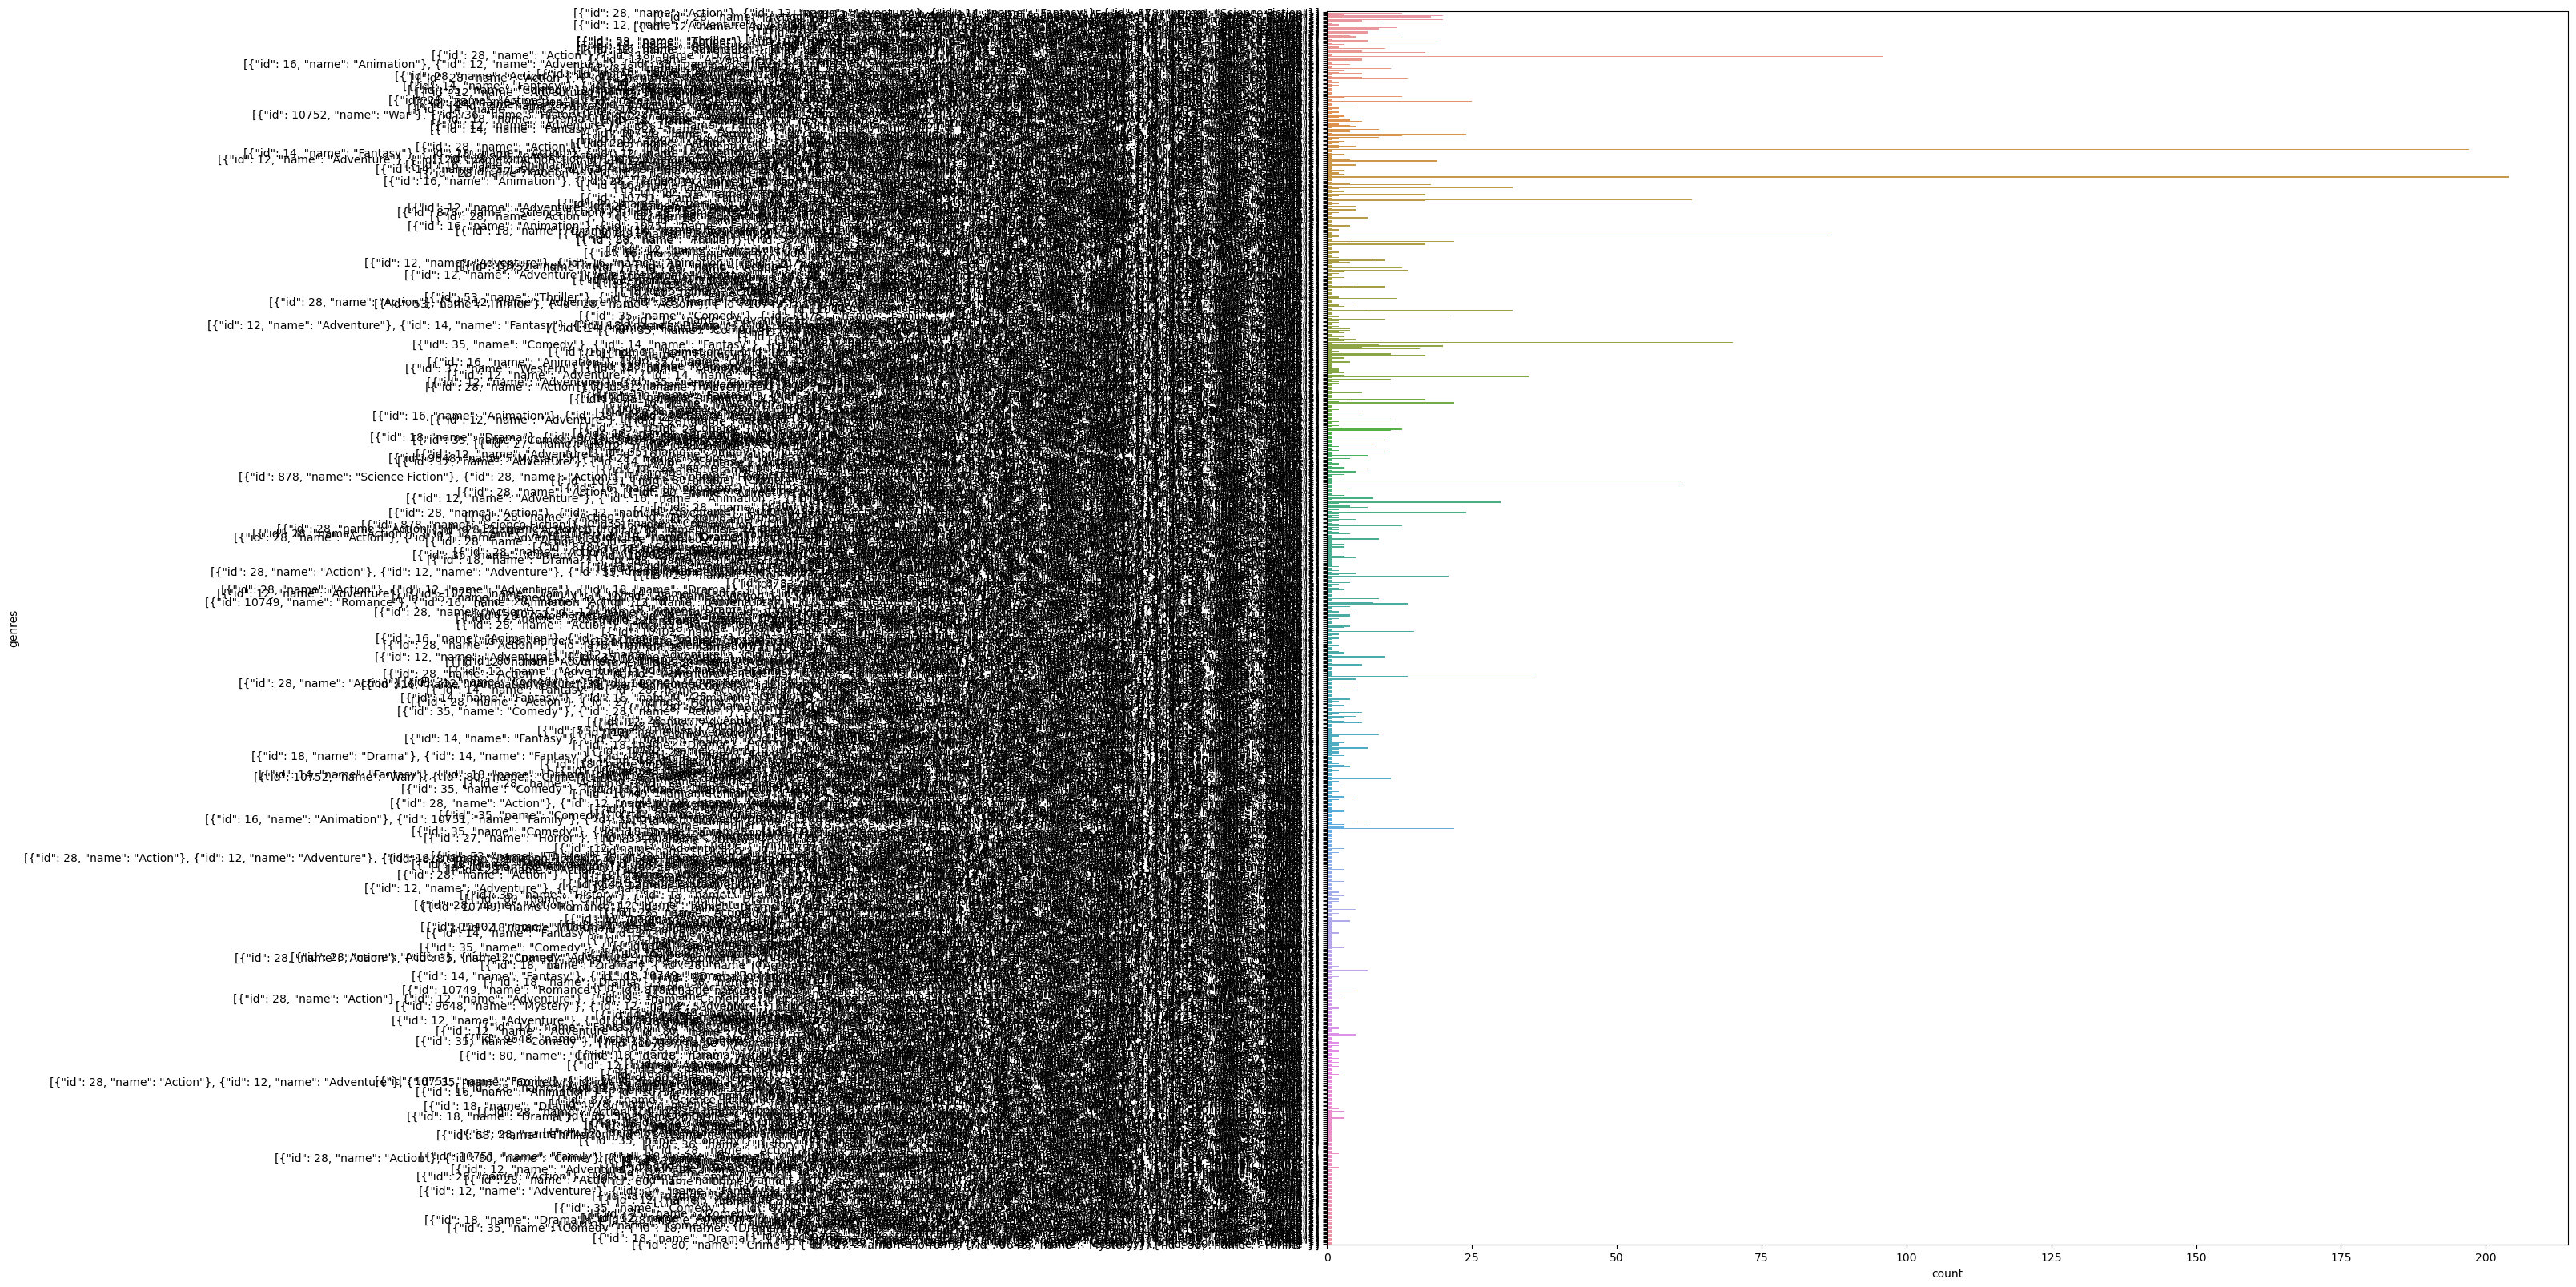

In [28]:
#### Generate three different interesting visualisations with a data story.

fig = plt.figure(figsize=(20,20))
sns.countplot(y=movies_df['genres'], data=movies_df);







# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

In [35]:
import missingno
import matplotlib.pyplot as plt

In [31]:
auto_df = pd.read_csv('automobile.txt')
auto_df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [32]:
auto_df.drop_duplicates()
auto_df

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19    3.40              10.0        102   
4            136         mpfi  3.19    3.40               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01    3.40              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [60]:
auto_df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

<AxesSubplot:>

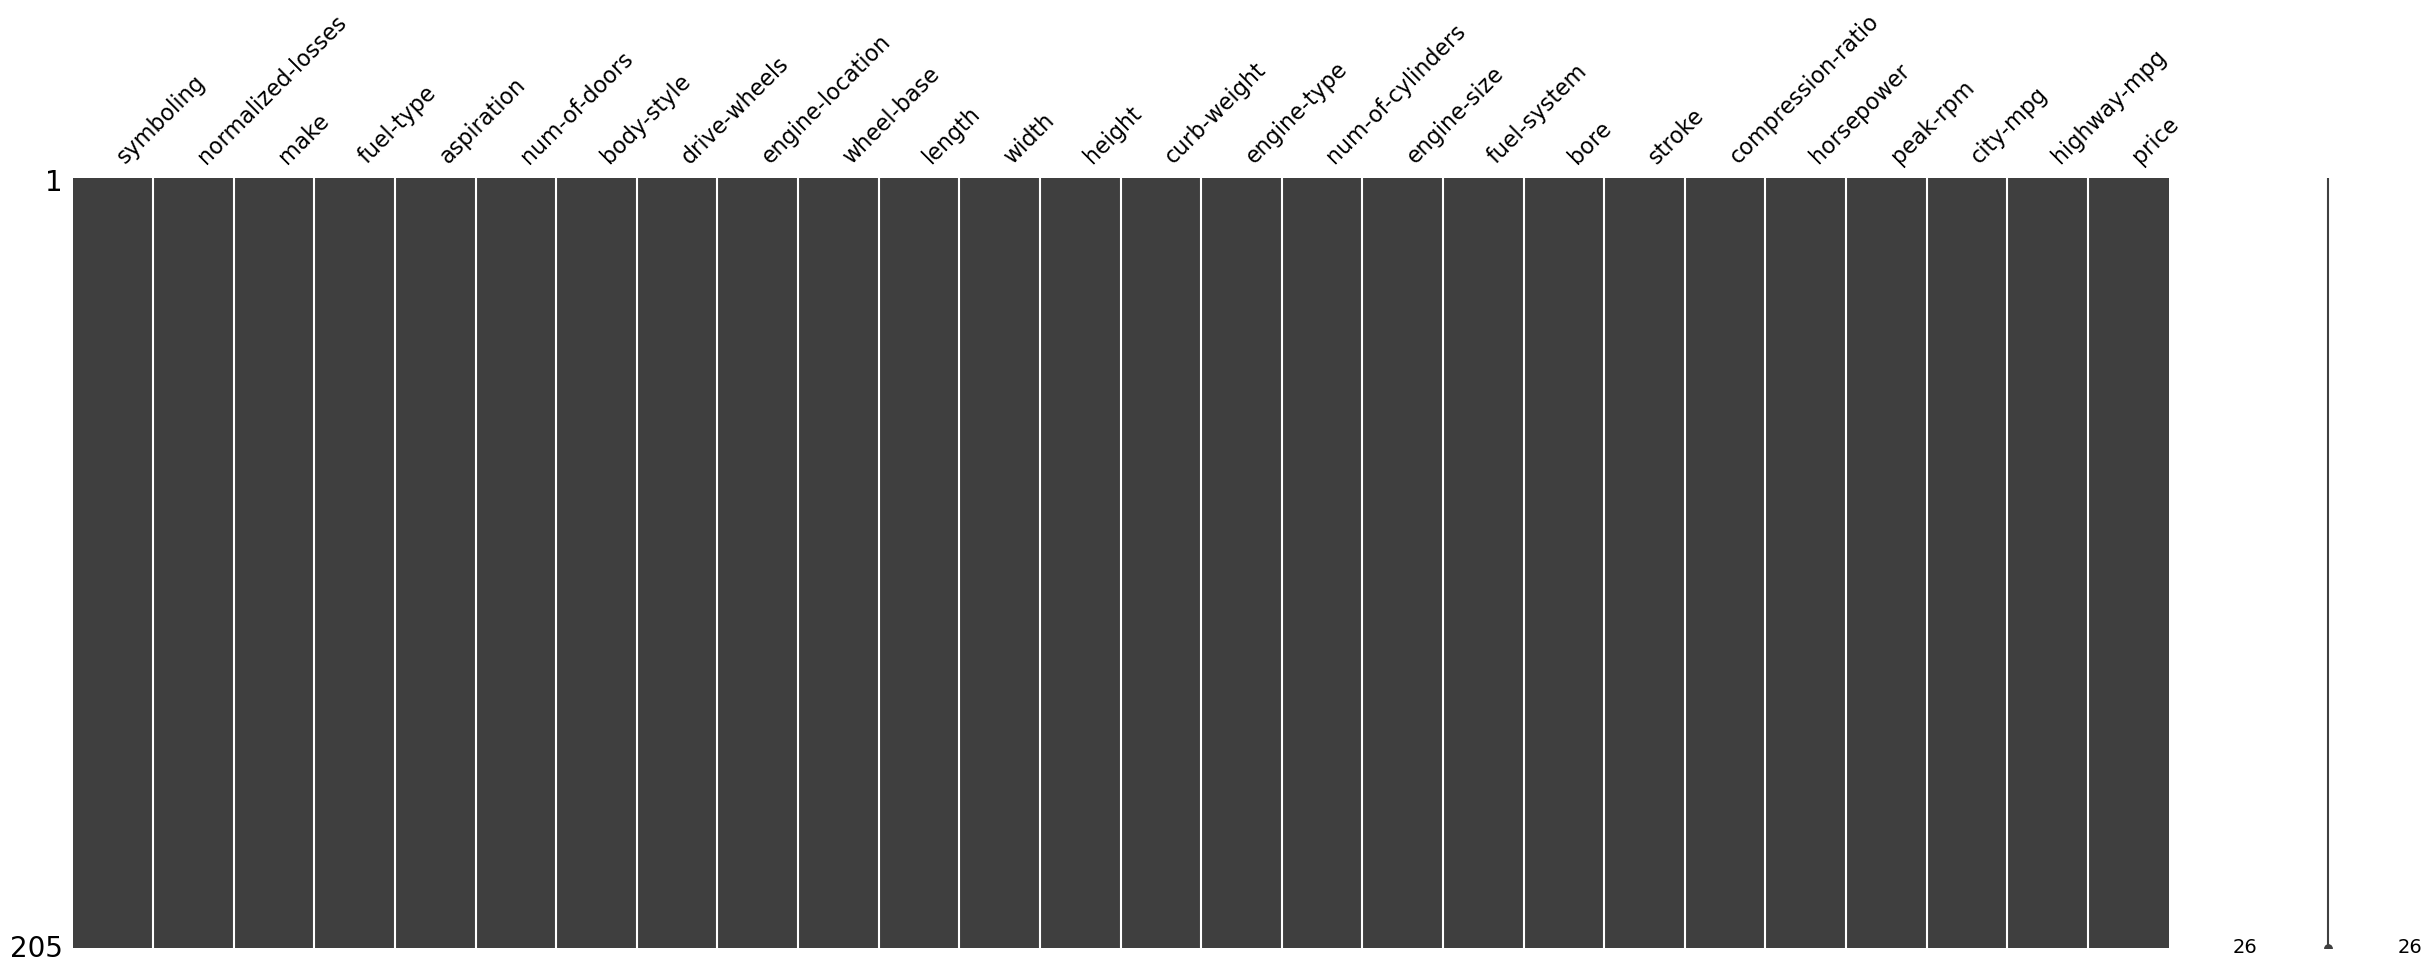

In [36]:
missingno.matrix(auto_df, figsize = (30,10))

In [37]:
print(auto_df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [65]:
auto_df = auto_df.drop(auto_df[auto_df['price'] == '?'].index)
auto_df = auto_df.drop(auto_df[auto_df['normalized-losses'] == '?'].index)
auto_df = auto_df.drop(auto_df[auto_df['bore'] == '?'].index)
auto_df = auto_df.drop(auto_df[auto_df['stroke'] == '?'].index)
auto_df

symboling  normalized-losses   make fuel-type aspiration num-of-doors  \
3            2                164   audi       gas        std         four   
4            2                164   audi       gas        std         four   
6            1                158   audi       gas        std         four   
8            1                158   audi       gas      turbo         four   
10           2                192    bmw       gas        std          two   
..         ...                ...    ...       ...        ...          ...   
200         -1                 95  volvo       gas        std         four   
201         -1                 95  volvo       gas      turbo         four   
202         -1                 95  volvo       gas        std         four   
203         -1                 95  volvo    diesel      turbo         four   
204         -1                 95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   
6        sedan          fwd           front       105.8  ...          136   
8        sedan          fwd           front       105.8  ...          131   
10       sedan          rwd           front       101.2  ...          108   
..         ...          ...             ...         ...  ...          ...   
200      sedan          rwd           front       109.1  ...          141   
201      sedan          rwd           front       109.1  ...          141   
202      sedan          rwd           front       109.1  ...          173   
203      sedan          rwd           front       109.1  ...          145   
204      sedan          rwd           front       109.1  ...          141   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
3           mpfi  3.19    3.40              10.0        102      5500   
4           mpfi  3.19    3.40               8.0        115      5500   
6           mpfi  3.19    3.40               8.5        110      5500   
8           mpfi  3.13    3.40               8.3        140      5500   
10          mpfi  3.50    2.80               8.8        101      5800   
..           ...   ...     ...               ...        ...       ...   
200         mpfi  3.78    3.15               9.5        114      5400   
201         mpfi  3.78    3.15               8.7        160      5300   
202         mpfi  3.58    2.87               8.8        134      5500   
203          idi  3.01    3.40              23.0        106      4800   
204         mpfi  3.78    3.15               9.5        114      5400   

    city-mpg highway-mpg  price  
3         24          30  13950  
4         18          22  17450  
6         19          25  17710  
8         17          20  23875  
10        23          29  16430  
..       ...         ...    ...  
200       23          28  16845  
201       19          25  19045  
202       18          23  21485  
203       26          27  22470  
204       19          25  22625  

[160 rows x 26 columns]

In [67]:
auto_df = auto_df.astype({"price":"int64"})
auto_df = auto_df.astype({"normalized-losses":"int64"})
auto_df = auto_df.astype({"stroke":"float64"})
auto_df = auto_df.astype({"bore":"float64"})
print(auto_df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [63]:
sorted = auto_df.sort_values(by='price', ascending=False)
sorted.head()

symboling  normalized-losses           make fuel-type aspiration  \
72          3                142  mercedes-benz       gas        std   
47          0                145         jaguar       gas        std   
70         -1                 93  mercedes-benz    diesel      turbo   
68         -1                 93  mercedes-benz    diesel      turbo   
69          0                 93  mercedes-benz    diesel      turbo   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
72          two  convertible          rwd           front        96.6  ...   
47         four        sedan          rwd           front       113.0  ...   
70         four        sedan          rwd           front       115.6  ...   
68         four        wagon          rwd           front       110.0  ...   
69          two      hardtop          rwd           front       106.7  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
72          234         mpfi  3.46    3.10               8.3        155   
47          258         mpfi  3.63    4.17               8.1        176   
70          183          idi  3.58    3.64              21.5        123   
68          183          idi  3.58    3.64              21.5        123   
69          183          idi  3.58    3.64              21.5        123   

    peak-rpm city-mpg highway-mpg  price  
72      4750       16          18  35056  
47      4750       15          19  32250  
70      4350       22          25  31600  
68      4350       22          25  28248  
69      4350       22          25  28176  

[5 rows x 26 columns]

In [64]:
sorted.tail()

symboling  normalized-losses        make fuel-type aspiration  \
76           2                161  mitsubishi       gas        std   
150          1                 87      toyota       gas        std   
50           1                104       mazda       gas        std   
18           2                121   chevrolet       gas        std   
138          2                 83      subaru       gas        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
76           two  hatchback          fwd           front        93.7  ...   
150          two  hatchback          fwd           front        95.7  ...   
50           two  hatchback          fwd           front        93.1  ...   
18           two  hatchback          fwd           front        88.4  ...   
138          two  hatchback          fwd           front        93.7  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
76            92         2bbl  2.97    3.23               9.4         68   
150           92         2bbl  3.05    3.03               9.0         62   
50            91         2bbl  3.03    3.15               9.0         68   
18            61         2bbl  2.91    3.03               9.5         48   
138           97         2bbl  3.62    2.36               9.0         69   

     peak-rpm city-mpg highway-mpg price  
76       5500       37          41  5389  
150      4800       35          39  5348  
50       5000       30          31  5195  
18       5100       47          53  5151  
138      4900       31          36  5118  

[5 rows x 26 columns]

In [68]:
auto_df.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  160.000000         160.000000  160.000000  160.000000  160.000000   
mean     0.737500         121.300000   98.235625  172.319375   65.596250   
std      1.189511          35.602417    5.163763   11.548860    1.946999   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  165.525000   64.000000   
50%      1.000000         114.000000   96.900000  172.200000   65.400000   
75%      2.000000         148.000000  100.600000  177.800000   66.500000   
max      3.000000         256.000000  115.600000  202.600000   71.700000   

           height  curb-weight  engine-size        bore      stroke  \
count  160.000000   160.000000   160.000000  160.000000  160.000000   
mean    53.878750  2459.450000   119.093750    3.298438    3.237312   
std      2.276608   480.897834    30.411186    0.267348    0.294210   
min     49.400000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2073.250000    97.000000    3.050000    3.107500   
50%     54.100000  2338.500000   110.000000    3.270000    3.270000   
75%     55.500000  2808.750000   134.500000    3.550000    3.410000   
max     59.800000  4066.000000   258.000000    3.940000    4.170000   

       compression-ratio    city-mpg  highway-mpg         price  
count         160.000000  160.000000   160.000000    160.000000  
mean           10.145125   26.506250    32.068750  11427.681250  
std             3.882507    6.081208     6.440948   5863.789011  
min             7.000000   15.000000    18.000000   5118.000000  
25%             8.700000   23.000000    28.000000   7383.500000  
50%             9.000000   26.000000    32.000000   9164.000000  
75%             9.400000   31.000000    37.000000  14559.250000  
max            23.000000   49.000000    54.000000  35056.000000

In [69]:
binwidth = int((max(auto_df['price']) - min(auto_df['price']))/3)
bins = range(int(min(auto_df['price'])), int(max(auto_df['price'])), binwidth)

In [70]:
auto_df['price_cat']= pd.cut(auto_df['price'],bins, labels = ['Low', 'Medium', 'High'])
auto_df.head()

symboling  normalized-losses  make fuel-type aspiration num-of-doors  \
3           2                164  audi       gas        std         four   
4           2                164  audi       gas        std         four   
6           1                158  audi       gas        std         four   
8           1                158  audi       gas      turbo         four   
10          2                192   bmw       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
3       sedan          fwd           front        99.8  ...         mpfi   
4       sedan          4wd           front        99.4  ...         mpfi   
6       sedan          fwd           front       105.8  ...         mpfi   
8       sedan          fwd           front       105.8  ...         mpfi   
10      sedan          rwd           front       101.2  ...         mpfi   

    bore  stroke  compression-ratio horsepower peak-rpm  city-mpg highway-mpg  \
3   3.19     3.4               10.0        102     5500        24          30   
4   3.19     3.4                8.0        115     5500        18          22   
6   3.19     3.4                8.5        110     5500        19          25   
8   3.13     3.4                8.3        140     5500        17          20   
10  3.50     2.8                8.8        101     5800        23          29   

    price  price_cat  
3   13950        Low  
4   17450     Medium  
6   17710     Medium  
8   23875     Medium  
10  16430     Medium  

[5 rows x 27 columns]

In [73]:
sorted = auto_df.sort_values(by='price', ascending=False)
sorted

symboling  normalized-losses           make fuel-type aspiration  \
72           3                142  mercedes-benz       gas        std   
47           0                145         jaguar       gas        std   
70          -1                 93  mercedes-benz    diesel      turbo   
68          -1                 93  mercedes-benz    diesel      turbo   
69           0                 93  mercedes-benz    diesel      turbo   
..         ...                ...            ...       ...        ...   
76           2                161     mitsubishi       gas        std   
150          1                 87         toyota       gas        std   
50           1                104          mazda       gas        std   
18           2                121      chevrolet       gas        std   
138          2                 83         subaru       gas        std   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
72           two  convertible          rwd           front        96.6  ...   
47          four        sedan          rwd           front       113.0  ...   
70          four        sedan          rwd           front       115.6  ...   
68          four        wagon          rwd           front       110.0  ...   
69           two      hardtop          rwd           front       106.7  ...   
..           ...          ...          ...             ...         ...  ...   
76           two    hatchback          fwd           front        93.7  ...   
150          two    hatchback          fwd           front        95.7  ...   
50           two    hatchback          fwd           front        93.1  ...   
18           two    hatchback          fwd           front        88.4  ...   
138          two    hatchback          fwd           front        93.7  ...   

     fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  \
72          mpfi  3.46    3.10                8.3        155     4750   
47          mpfi  3.63    4.17                8.1        176     4750   
70           idi  3.58    3.64               21.5        123     4350   
68           idi  3.58    3.64               21.5        123     4350   
69           idi  3.58    3.64               21.5        123     4350   
..           ...   ...     ...                ...        ...      ...   
76          2bbl  2.97    3.23                9.4         68     5500   
150         2bbl  3.05    3.03                9.0         62     4800   
50          2bbl  3.03    3.15                9.0         68     5000   
18          2bbl  2.91    3.03                9.5         48     5100   
138         2bbl  3.62    2.36                9.0         69     4900   

     city-mpg highway-mpg  price  price_cat  
72         16          18  35056        NaN  
47         15          19  32250       High  
70         22          25  31600       High  
68         22          25  28248       High  
69         22          25  28176       High  
..        ...         ...    ...        ...  
76         37          41   5389        Low  
150        35          39   5348        Low  
50         30          31   5195        Low  
18         47          53   5151        Low  
138        31          36   5118        NaN  

[160 rows x 27 columns]

In [74]:
dummy_variables = pd.get_dummies(auto_df["fuel-type"])
dummy_variables.rename(columns = {'fuel-type': 'gas', 'fuel-type': 'diesel'}, inplace = True)

In [75]:
auto_df = pd.concat([auto_df, dummy_variables], axis = 1)

In [76]:
auto_df

symboling  normalized-losses   make fuel-type aspiration num-of-doors  \
3            2                164   audi       gas        std         four   
4            2                164   audi       gas        std         four   
6            1                158   audi       gas        std         four   
8            1                158   audi       gas      turbo         four   
10           2                192    bmw       gas        std          two   
..         ...                ...    ...       ...        ...          ...   
200         -1                 95  volvo       gas        std         four   
201         -1                 95  volvo       gas      turbo         four   
202         -1                 95  volvo       gas        std         four   
203         -1                 95  volvo    diesel      turbo         four   
204         -1                 95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  stroke  \
3        sedan          fwd           front        99.8  ...    3.40   
4        sedan          4wd           front        99.4  ...    3.40   
6        sedan          fwd           front       105.8  ...    3.40   
8        sedan          fwd           front       105.8  ...    3.40   
10       sedan          rwd           front       101.2  ...    2.80   
..         ...          ...             ...         ...  ...     ...   
200      sedan          rwd           front       109.1  ...    3.15   
201      sedan          rwd           front       109.1  ...    3.15   
202      sedan          rwd           front       109.1  ...    2.87   
203      sedan          rwd           front       109.1  ...    3.40   
204      sedan          rwd           front       109.1  ...    3.15   

     compression-ratio  horsepower  peak-rpm city-mpg highway-mpg  price  \
3                 10.0         102      5500       24          30  13950   
4                  8.0         115      5500       18          22  17450   
6                  8.5         110      5500       19          25  17710   
8                  8.3         140      5500       17          20  23875   
10                 8.8         101      5800       23          29  16430   
..                 ...         ...       ...      ...         ...    ...   
200                9.5         114      5400       23          28  16845   
201                8.7         160      5300       19          25  19045   
202                8.8         134      5500       18          23  21485   
203               23.0         106      4800       26          27  22470   
204                9.5         114      5400       19          25  22625   

    price_cat  diesel  gas  
3         Low       0    1  
4      Medium       0    1  
6      Medium       0    1  
8      Medium       0    1  
10     Medium       0    1  
..        ...     ...  ...  
200    Medium       0    1  
201    Medium       0    1  
202    Medium       0    1  
203    Medium       1    0  
204    Medium       0    1  

[160 rows x 29 columns]

In [77]:
auto_df.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  160.000000         160.000000  160.000000  160.000000  160.000000   
mean     0.737500         121.300000   98.235625  172.319375   65.596250   
std      1.189511          35.602417    5.163763   11.548860    1.946999   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  165.525000   64.000000   
50%      1.000000         114.000000   96.900000  172.200000   65.400000   
75%      2.000000         148.000000  100.600000  177.800000   66.500000   
max      3.000000         256.000000  115.600000  202.600000   71.700000   

           height  curb-weight  engine-size        bore      stroke  \
count  160.000000   160.000000   160.000000  160.000000  160.000000   
mean    53.878750  2459.450000   119.093750    3.298438    3.237312   
std      2.276608   480.897834    30.411186    0.267348    0.294210   
min     49.400000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2073.250000    97.000000    3.050000    3.107500   
50%     54.100000  2338.500000   110.000000    3.270000    3.270000   
75%     55.500000  2808.750000   134.500000    3.550000    3.410000   
max     59.800000  4066.000000   258.000000    3.940000    4.170000   

       compression-ratio    city-mpg  highway-mpg         price      diesel  \
count         160.000000  160.000000   160.000000    160.000000  160.000000   
mean           10.145125   26.506250    32.068750  11427.681250    0.093750   
std             3.882507    6.081208     6.440948   5863.789011    0.292396   
min             7.000000   15.000000    18.000000   5118.000000    0.000000   
25%             8.700000   23.000000    28.000000   7383.500000    0.000000   
50%             9.000000   26.000000    32.000000   9164.000000    0.000000   
75%             9.400000   31.000000    37.000000  14559.250000    0.000000   
max            23.000000   49.000000    54.000000  35056.000000    1.000000   

              gas  
count  160.000000  
mean     0.906250  
std      0.292396  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

In [78]:
drive_wheel_ct = auto_df['drive-wheels'].value_counts()
drive_wheel_ct

fwd    106
rwd     46
4wd      8
Name: drive-wheels, dtype: int64

In [79]:
aspiration_ct = auto_df['aspiration'].value_counts()
aspiration_ct

std      132
turbo     28
Name: aspiration, dtype: int64

In [80]:
make_ct = auto_df['make'].value_counts()
make_ct

toyota           31
nissan           18
honda            13
subaru           12
mazda            11
volvo            11
mitsubishi       10
dodge             9
volkswagen        8
peugot            7
plymouth          6
saab              6
mercedes-benz     5
bmw               4
audi              4
chevrolet         3
jaguar            1
porsche           1
Name: make, dtype: int64

In [81]:
num_doors_ct = make_ct = auto_df['num-of-doors'].value_counts()
num_doors_ct

four    95
two     64
?        1
Name: num-of-doors, dtype: int64

In [83]:
engine_loc_ct = auto_df['engine-location'].value_counts()
engine_loc_ct

front    160
Name: engine-location, dtype: int64

In [85]:
body_style_ct = auto_df['body-style'].value_counts()
body_style_ct

sedan          80
hatchback      56
wagon          17
hardtop         5
convertible     2
Name: body-style, dtype: int64

In [86]:
fuel_system_ct = auto_df['fuel-system'].value_counts()
fuel_system_ct

mpfi    65
2bbl    63
idi     15
1bbl    11
spdi     5
mfi      1
Name: fuel-system, dtype: int64

In [87]:
price_cat_ct = auto_df['price_cat'].value_counts()
price_cat_ct

Low       120
Medium     33
High        5
Name: price_cat, dtype: int64

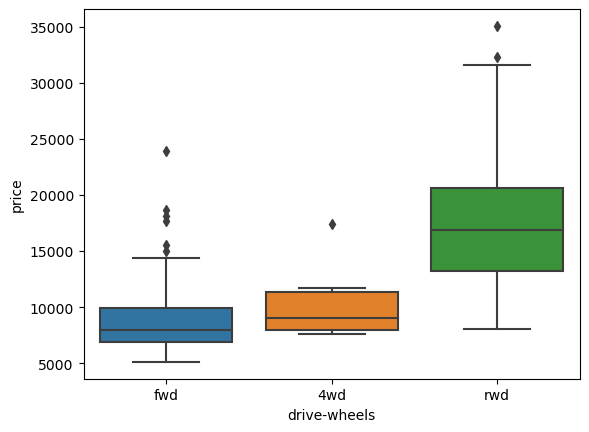

In [88]:
sns.boxplot(x = 'drive-wheels', y='price', data = auto_df)
plt.show()

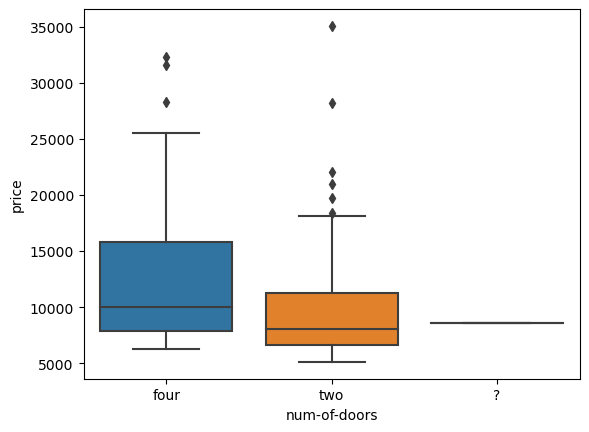

In [89]:
sns.boxplot(x = 'num-of-doors', y='price', data = auto_df)
plt.show()

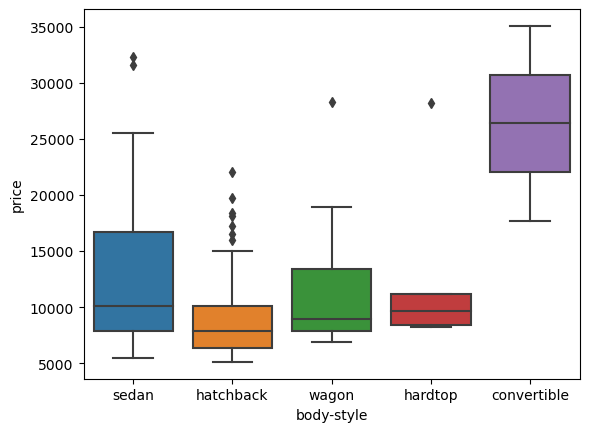

In [90]:
sns.boxplot(x = 'body-style', y='price', data = auto_df)
plt.show()

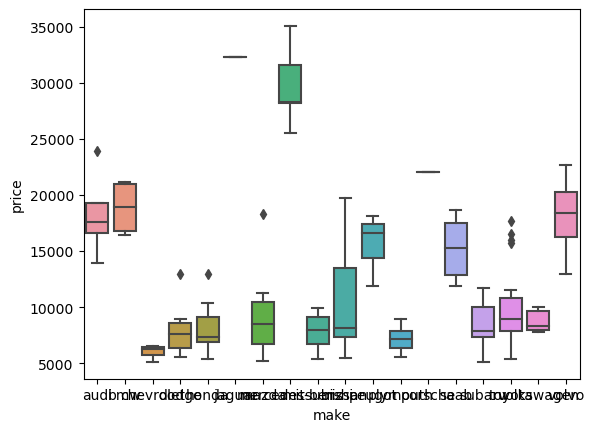

In [91]:
sns.boxplot(x = 'make', y='price', data = auto_df)
plt.show()

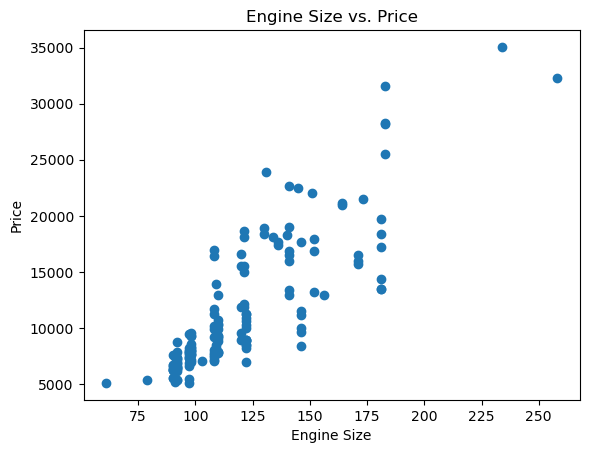

In [92]:
x = auto_df['engine-size']
y = auto_df['price']
plt.scatter(x,y)
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [99]:
auto_df_group = auto_df[['drive-wheels', 'body-style', 'price']]

In [100]:
drive_wheel_avg = auto_df_group.groupby(['drive-wheels'], as_index = False).mean()
drive_wheel_avg

drive-wheels         price
0          4wd  10241.000000
1          fwd   8808.650943
2          rwd  17669.217391

In [101]:
group_avg = auto_df_group.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
group_avg

drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd      hardtop   8249.000000
4           fwd    hatchback   7989.800000
5           fwd        sedan   9538.509804
6           fwd        wagon   8829.222222
7           rwd  convertible  26362.500000
8           rwd      hardtop  14365.750000
9           rwd    hatchback  14918.500000
10          rwd        sedan  18318.576923
11          rwd        wagon  19282.000000

In [102]:
pivot_table = group_avg.pivot(index='drive-wheels', columns='body-style')
pivot_table

price                                                
body-style   convertible   hardtop hatchback         sedan         wagon
drive-wheels                                                            
4wd                  NaN       NaN    7603.0  12647.333333   9095.750000
fwd                  NaN   8249.00    7989.8   9538.509804   8829.222222
rwd              26362.5  14365.75   14918.5  18318.576923  19282.000000

In [103]:
pivot_table = pivot_table.fillna(0)
pivot_table

price                                                
body-style   convertible   hardtop hatchback         sedan         wagon
drive-wheels                                                            
4wd                  0.0      0.00    7603.0  12647.333333   9095.750000
fwd                  0.0   8249.00    7989.8   9538.509804   8829.222222
rwd              26362.5  14365.75   14918.5  18318.576923  19282.000000

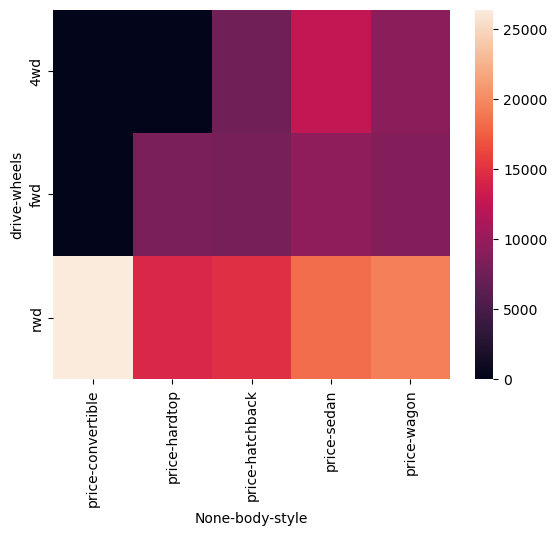

In [104]:
sns.heatmap(pivot_table)
plt.show()

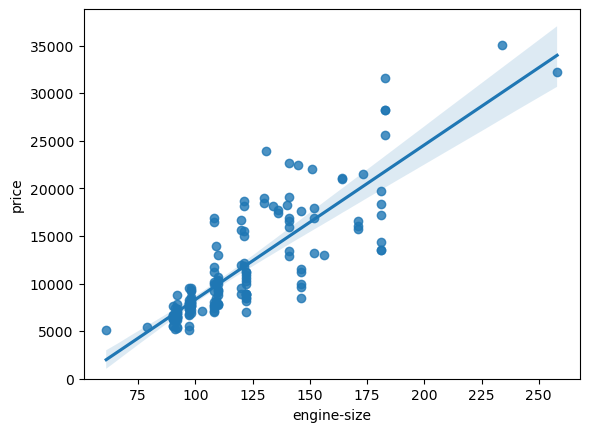

In [93]:
sns.regplot(x = 'engine-size', y='price', data = auto_df)
plt.ylim(0,)
plt.show()

In [95]:
auto_df.corr()

symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.518388   -0.520465 -0.336217   
normalized-losses   0.518388           1.000000   -0.064001  0.029114   
wheel-base         -0.520465          -0.064001    1.000000  0.871968   
length             -0.336217           0.029114    0.871968  1.000000   
width              -0.219850           0.104857    0.815935  0.839184   
height             -0.473994          -0.417081    0.558764  0.505156   
curb-weight        -0.252372           0.122860    0.810507  0.870355   
engine-size        -0.110238           0.203841    0.650488  0.726666   
bore               -0.257013          -0.036167    0.580484  0.649059   
stroke             -0.020539           0.065627    0.164012  0.116049   
compression-ratio  -0.139022          -0.129971    0.293968  0.188968   
city-mpg            0.088912          -0.236934   -0.576635 -0.716877   
highway-mpg         0.149309          -0.189691   -0.608270 -0.717831   
price              -0.163329           0.199924    0.734789  0.760323   
diesel             -0.163874          -0.111468    0.340593  0.232083   
gas                 0.163874           0.111468   -0.340593 -0.232083   

                      width    height  curb-weight  engine-size      bore  \
symboling         -0.219850 -0.473994    -0.252372    -0.110238 -0.257013   
normalized-losses  0.104857 -0.417081     0.122860     0.203841 -0.036167   
wheel-base         0.815935  0.558764     0.810507     0.650488  0.580484   
length             0.839184  0.505156     0.870355     0.726666  0.649059   
width              1.000000  0.298403     0.870649     0.780018  0.575048   
height             0.298403  1.000000     0.369363     0.116505  0.261501   
curb-weight        0.870649  0.369363     1.000000     0.888847  0.646640   
engine-size        0.780018  0.116505     0.888847     1.000000  0.597336   
bore               0.575048  0.261501     0.646640     0.597336  1.000000   
stroke             0.192891 -0.095364     0.171691     0.296693 -0.105464   
compression-ratio  0.261530  0.237432     0.226513     0.143568  0.019216   
city-mpg          -0.662123 -0.194559    -0.759538    -0.695890 -0.585618   
highway-mpg       -0.689367 -0.221646    -0.787167    -0.711364 -0.586729   
price              0.843316  0.247500     0.893810     0.841725  0.534891   
diesel             0.313267  0.246772     0.288372     0.191389  0.063032   
gas               -0.313267 -0.246772    -0.288372    -0.191389 -0.063032   

                     stroke  compression-ratio  city-mpg  highway-mpg  \
symboling         -0.020539          -0.139022  0.088912     0.149309   
normalized-losses  0.065627          -0.129971 -0.236934    -0.189691   
wheel-base         0.164012           0.293968 -0.576635    -0.608270   
length             0.116049           0.188968 -0.716877    -0.717831   
width              0.192891           0.261530 -0.662123    -0.689367   
height            -0.095364           0.237432 -0.194559    -0.221646   
curb-weight        0.171691           0.226513 -0.759538    -0.787167   
engine-size        0.296693           0.143568 -0.695890    -0.711364   
bore              -0.105464           0.019216 -0.585618    -0.586729   
stroke             1.000000           0.240895 -0.021381    -0.013974   
compression-ratio  0.240895           1.000000  0.279513     0.222442   
city-mpg          -0.021381           0.279513  1.000000     0.971997   
highway-mpg       -0.013974           0.222442  0.971997     1.000000   
price              0.158798           0.210948 -0.690100    -0.718314   
diesel             0.269066           0.987378  0.206586     0.150173   
gas               -0.269066          -0.987378 -0.206586    -0.150173   

                      price    diesel       gas  
symboling         -0.163329 -0.163874  0.163874  
normalized-losses  0.199924 -0.111468  0.111468  
wheel-base         0.734789  0.340593 -0.340593  
length             0.7603

In [98]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(auto_df['wheel-base'], auto_df['price'])
print("Pearson CoEfficient: ", pearson_coef, "P Value: ", p_value)

Pearson CoEfficient:  0.7347887995104846 P Value:  1.9848038892520399e-28


In [105]:
pearson_coef, p_value = stats.pearsonr(auto_df['width'], auto_df['price'])
print("Pearson CoEfficient: ", pearson_coef, "P Value: ", p_value)

Pearson CoEfficient:  0.8433156998339979 P Value:  1.8375102924781475e-44


In [106]:
pearson_coef, p_value = stats.pearsonr(auto_df['height'], auto_df['price'])
print("Pearson CoEfficient: ", pearson_coef, "P Value: ", p_value)

Pearson CoEfficient:  0.2475002354991344 P Value:  0.0016030496321024403


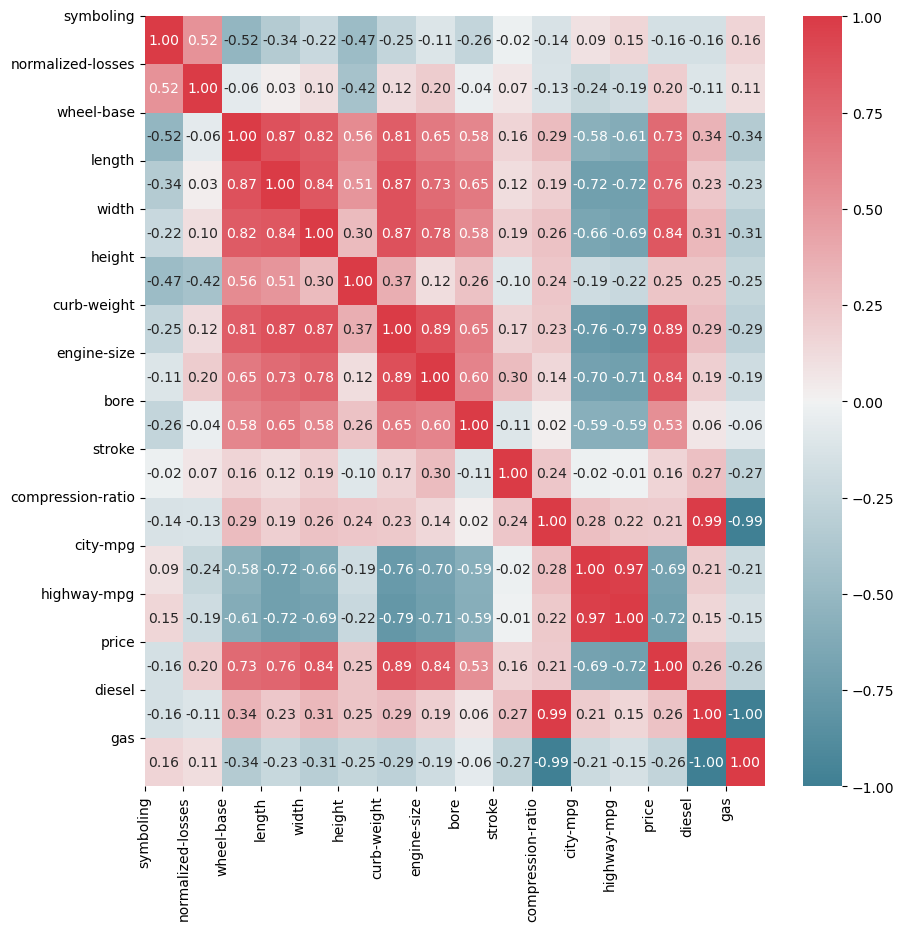

In [107]:
corr = auto_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap = colormap, annot=True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()